## Практическая работа №9
+ Язык программирования: Python
+ Создать тематическую модель

Решение:
+ Загрузить библиотеку genism.

In [1]:
%pip install gensim
%pip install pandarallel
%pip install pandas
%pip install beautifulsoup4
%pip install lxml

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviou

В качестве исходного набора данных будет использоваться набор:
+ Стандартный набор для машинного обучения – собрание текстов
новостей AP (Associated Press)
+ В наборе 2246 документов и они представлены в нужном для
моделирования формате.
+ В папке /ap представлены сами документы (ap.txt, ap.dat), словарь
(vocab.txt).

Файл ap.dat состоит из кол-ва слов и номеров слов из словаря и частот
записанных в формате 178:1.
В файле ap.txt хранятся исходные тексты.

In [2]:
import tarfile 

with tarfile.open('./ap.tgz') as archive:
    archive.extractall('./ap')

3 Для построения модели используется конструктор с большим
количеством параметров:
class gensim.models.ldamodel.LdaModel( corpus=None, num_topics=100,
id2word=None,
distributed=False,
update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0,
eval_every=10,
iterations=50,
minimum_probability=0.01,
random_state=None,
minimum_phi_value=0.01, per_word_topics=False, callbacks=None)
В примере используются параметры:
+ corpus – набор текстов,
+ id2word - используется для определения размера словаря,
+ alpha - по умолчанию 1/num_topics, чем меньше alpha, тем
меньше ожидаемое число тем для каждого документа, и
наоборот.

In [3]:
from gensim import corpora, models

corpus = corpora.BleiCorpus('./ap/ap/ap.dat', './ap/ap/vocab.txt')

In [4]:
model = models.ldamodel.LdaModel(corpus, id2word = corpus.id2word)

In [5]:
doc = corpus.docbyoffset(0) # первый документ
topics = model[doc]
print(topics)

[(23, 0.09868356), (43, 0.6386598), (59, 0.021812666), (79, 0.054342844), (80, 0.1590245)]


In [6]:
# данные для гистограммы частотности тем, ассоциированных с документами
num_topics_used = [len(model[doc]) for doc in corpus]
print (num_topics_used)

[5, 13, 9, 22, 4, 10, 10, 4, 3, 12, 7, 10, 12, 5, 10, 6, 13, 11, 7, 7, 4, 2, 3, 6, 14, 16, 9, 7, 15, 10, 9, 11, 7, 2, 13, 9, 15, 10, 9, 7, 6, 8, 18, 8, 13, 10, 7, 7, 14, 7, 4, 5, 13, 18, 5, 8, 9, 6, 13, 1, 12, 11, 8, 14, 6, 6, 8, 7, 8, 9, 8, 16, 7, 9, 10, 10, 12, 10, 18, 12, 16, 9, 6, 9, 11, 15, 8, 7, 4, 12, 16, 12, 10, 6, 12, 18, 12, 6, 5, 14, 19, 15, 2, 9, 8, 8, 5, 14, 10, 7, 11, 14, 4, 8, 20, 9, 9, 13, 12, 5, 3, 1, 4, 13, 6, 11, 17, 4, 8, 9, 8, 10, 5, 12, 11, 10, 13, 6, 8, 9, 15, 11, 11, 10, 9, 12, 8, 14, 5, 15, 10, 3, 12, 4, 5, 10, 9, 14, 15, 8, 4, 2, 11, 12, 6, 6, 15, 9, 14, 12, 10, 19, 8, 11, 9, 7, 7, 10, 5, 10, 13, 9, 10, 9, 11, 10, 4, 7, 8, 10, 12, 9, 10, 8, 11, 9, 13, 10, 11, 6, 10, 12, 9, 8, 9, 6, 15, 7, 6, 7, 12, 5, 7, 8, 13, 10, 7, 8, 7, 9, 10, 9, 11, 13, 16, 16, 2, 5, 14, 12, 10, 8, 16, 7, 9, 18, 5, 6, 11, 6, 11, 4, 13, 3, 9, 12, 3, 13, 10, 7, 14, 6, 13, 14, 10, 4, 10, 3, 9, 8, 14, 9, 15, 12, 10, 12, 9, 9, 3, 10, 6, 9, 9, 8, 4, 5, 11, 6, 11, 16, 9, 9, 8, 8, 9, 6, 13, 15, 1

(array([151., 273., 388., 469., 397., 370., 110.,  59.,  22.,   7.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

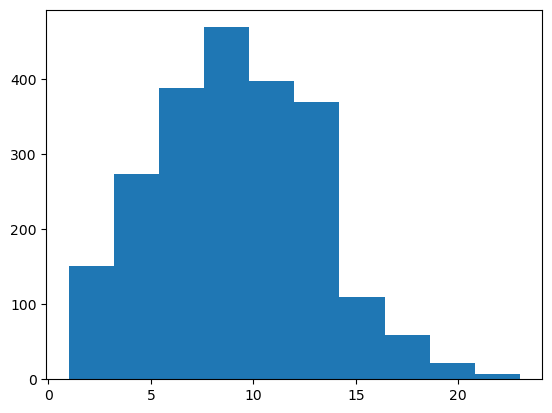

In [7]:
import matplotlib.pyplot as plt
plt.hist(num_topics_used)

In [8]:
for ti in range(10):
    words = model.show_topic(ti, 64)
    print (words)
    print()

[('committees', 0.03188042), ('rigs', 0.015108524), ('offer', 0.012590368), ('million', 0.011382932), ('services', 0.010486283), ('cycle', 0.009429605), ('insurance', 0.008699261), ('information', 0.008464626), ('share', 0.008294944), ('plc', 0.007507322), ('merger', 0.0072315126), ('retailers', 0.0067569437), ('company', 0.0067097032), ('stock', 0.0066703046), ('moderate', 0.0061083753), ('noting', 0.005979956), ('incoming', 0.005799224), ('willing', 0.005474695), ('shareholders', 0.0054008616), ('billion', 0.0052014804), ('new', 0.005193137), ('communications', 0.005106334), ('group', 0.0050576413), ('interest', 0.004853816), ('gop', 0.004740129), ('separate', 0.0046898113), ('board', 0.004667227), ('inc', 0.004323133), ('daniel', 0.00420429), ('percent', 0.0041602626), ('shares', 0.00414638), ('publishing', 0.004068831), ('republican', 0.0039985124), ('closed', 0.0039807116), ('bid', 0.0039375313), ('britain', 0.0038960932), ('subsidiaries', 0.003892982), ('campaign', 0.0038148686),

In [9]:
#вывод 10 тем с 10 словами в каждой и их вероятностями
print(model.print_topics(num_topics=10, num_words=10))

[(23, '0.010*"late" + 0.008*"immune" + 0.007*"i" + 0.007*"doctors" + 0.006*"hospital" + 0.006*"patients" + 0.005*"new" + 0.005*"disease" + 0.005*"infected" + 0.005*"cells"'), (39, '0.016*"relevant" + 0.008*"earth" + 0.007*"time" + 0.006*"new" + 0.006*"council" + 0.005*"economic" + 0.004*"causing" + 0.004*"lambert" + 0.004*"i" + 0.004*"burnham"'), (9, '0.011*"percent" + 0.010*"barr" + 0.009*"collective" + 0.008*"charities" + 0.007*"i" + 0.007*"flow" + 0.006*"hose" + 0.006*"evaluations" + 0.005*"pakistani" + 0.004*"two"'), (92, '0.017*"m" + 0.010*"reservation" + 0.008*"bus" + 0.007*"greece" + 0.007*"people" + 0.006*"ontario" + 0.005*"new" + 0.005*"government" + 0.004*"political" + 0.004*"police"'), (64, '0.020*"mohawk" + 0.016*"shark" + 0.010*"bentsen" + 0.008*"alternative" + 0.008*"united" + 0.007*"fiction" + 0.007*"jackson" + 0.006*"thompson" + 0.006*"government" + 0.006*"book"'), (6, '0.018*"billion" + 0.011*"percent" + 0.009*"orders" + 0.008*"deficit" + 0.008*"budget" + 0.007*"april"

4 Выполнить предобработку текстов из ap.txt – удаление стоп-слов, стемминг или лемматизацию. Сформировать новые ap.dat и vocab.txt

In [10]:
from pandarallel import pandarallel
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

pandarallel.initialize(progress_bar=True)


def preprocess(text):
    from nltk.tokenize import sent_tokenize
    from string import punctuation
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    sentences = sent_tokenize(text)
    # Lower case
    sentences = [sentence.lower() for sentence in sentences]
    # Remove punctuation
    sentences = [
        "".join(c for c in sentence if c not in punctuation) for sentence in sentences
    ]
    # Tokenize words
    sentences = [word_tokenize(sentence) for sentence in sentences]
    # Remove stopwords
    stop_words = stopwords.words("english")
    sentences = [
        [word for word in sentence if word not in stop_words] for sentence in sentences
    ]
    # Remove links
    sentences = [
        [word for word in sentence if not word.startswith("http")]
        for sentence in sentences
    ]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sentences = [
        [lemmatizer.lemmatize(word) for word in sentence] for sentence in sentences
    ]
    words = " ".join([" ".join(sentence) for sentence in sentences])
    return words

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
import pandas as pd

from bs4 import BeautifulSoup

with open("./ap/ap/ap.txt") as f:
    content = f.readlines()

content = [x.strip() for x in content]
content = " ".join(content)

soup = BeautifulSoup(content, "lxml")
texts = soup.findAll("text")
docno = soup.findAll("docno")

texts = [text.text.strip() for text in texts]
docno = [doc.text for doc in docno]

df = pd.DataFrame({"docno": docno, "text": texts})

In [12]:
# Create dir new_ap
import os
if not os.path.exists("new_ap"):
    os.makedirs("new_ap")
# Save to csv
df.to_csv("./new_ap/ap.csv", index=False)

In [13]:
# Load csv file
df = pd.read_csv("./new_ap/ap.csv")
# Drop rows with empty text
df = df.dropna(subset=["text"])
df.head()

,docno,text
0,AP881218-0003,A 16-year-old student at a private Baptist sch...
1,AP880224-0195,The Bechtel Group Inc. offered in 1985 to sell...
2,AP881017-0144,A gunman took a 74-year-old woman hostage afte...
3,AP881017-0219,"Today is Saturday, Oct. 29, the 303rd day of 1..."
4,AP900117-0022,Cupid has a new message for lovers this Valent...


In [14]:
# Preprocess text
df["text"] = df["text"].parallel_apply(preprocess)

In [15]:
df.head()

,docno,text
0,AP881218-0003,16yearold student private baptist school alleg...
1,AP880224-0195,bechtel group inc offered 1985 sell oil israel...
2,AP881017-0144,gunman took 74yearold woman hostage foiled att...
3,AP881017-0219,today saturday oct 29 303rd day 1988 63 day le...
4,AP900117-0022,cupid new message lover valentine day voluntee...
